## Objective:  Perform nonlinear and multivariate regression on energy data to predict oil price


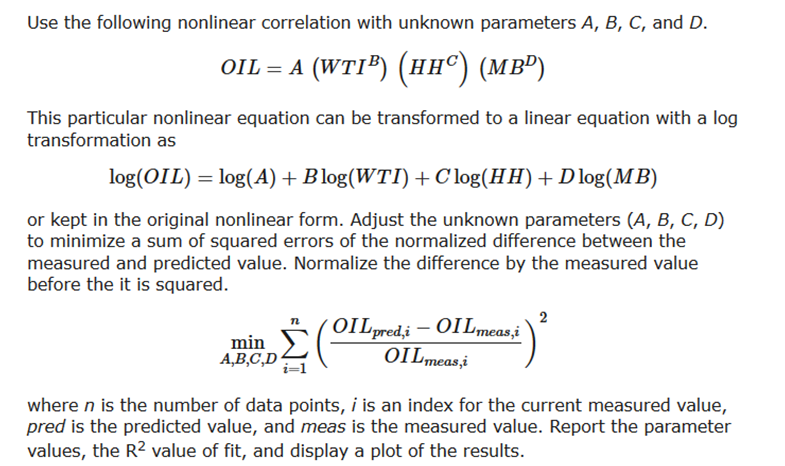

In [15]:
# solve for oil sales price (outcome)
# using 3 predictors of WTI Oil Price,
# Henry Hub Price and MB Propane Spot Price
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("OilPrice.xlsx")

df.head()

,YEAR,MONTH,WTI_PRICE,HH_PRICE,NGL_PRICE,BEST_PRICE
0,2000,1,27.24,2.40,0.555,26.6020
1,2000,2,29.21,2.66,0.596,28.8013
2,2000,3,29.92,2.78,0.512,29.0381
3,2000,4,25.78,3.04,0.469,25.0476
4,2000,5,28.78,3.59,0.512,28.3888


In [12]:

xm1 = np.array(df["WTI_PRICE"])  # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])   # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"])  # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"])  # oil sales price received (outcome)


In [11]:

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )
    return y


In [10]:
# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(4)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d

# show initial objective
print('Initial Objective: ' + str(objective(x0)))



Initial Objective: 153.0


In [8]:

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP', bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

Final Objective: 0.07875701862695708


In [7]:

# print solution
print('Solution')

cA = 'A = ' + str(x[0])
print(cA)
cB = 'B = ' + str(x[1])
print(cB)
cC = 'C = ' + str(x[2])
print(cC)
cD = 'D = ' + str(x[3])
print(cD)

cFormula = "Formula is : " + "\n" \
           + "A * WTI^B * HH^C * PROPANE^D"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n" + cObjective


Solution
A = 1.044240543983939
B = 0.9769542288806379
C = 0.02359961940577901
D = 0.022507757291054843


In [6]:

#ym measured outcome
#y  predicted outcome

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

R^2 correlation = 0.9964346365063944


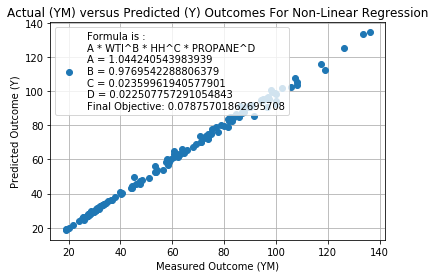

In [4]:
%matplotlib inline
# plot solution
plt.figure(1)
plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
plt.plot(ym,y,'o')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend([cLegend])
plt.grid(True)
plt.show()